In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [95]:
df = pd.read_csv('/kaggle/input/kagglex/train.csv')
df_test = pd.read_csv('/kaggle/input/kagglex/test.csv')

In [96]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [97]:
len(df.engine.unique())

1061

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [99]:
df['engine'].value_counts()

engine
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    1452
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             1125
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel             1054
285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel             979
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel              893
                                                         ... 
4.4 Liter GDI DOHC Twin Turbo                               1
3.0 Liter Twin Turbo                                        1
150.0HP 2.0L 4 Cylinder Engine Diesel Fuel                  1
266.0HP Electric Motor Electric Fuel System                 1
151.0HP Electric Motor Hydrogen Fuel                        1
Name: count, Length: 1061, dtype: int64

In [100]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [101]:
def extract_engine_features(engine_string):
    parts = engine_string.split()

    # Extract horsepower
    horsepower = next((float(part.replace('HP', '')) for part in parts if 'HP' in part), None)

    # Extract engine liter
    liter = next((float(part.replace('L', '')) for part in parts if 'L' in part and part[:-1].replace('.', '').isdigit()), None)

    # Extract number of cylinders, considering possible 'V' or other prefixes
    cylinders = next((int(part.lstrip('V')) for i, part in enumerate(parts) if i+1 < len(parts) and 'Cylinder' in parts[i+1] and part.lstrip('V').isdigit()), None)

    return horsepower, liter, cylinders

# Assume 'train_df' is your DataFrame and 'engine' is the column with engine details
df[['engine_hp', 'engine_liter', 'engine_cylinders']] = df['engine'].apply(lambda x: pd.Series(extract_engine_features(x)))
df_test[['engine_hp', 'engine_liter', 'engine_cylinders']] = df_test['engine'].apply(lambda x: pd.Series(extract_engine_features(x)))


# Display the updated DataFrame to verify the changes
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,engine_hp,engine_liter,engine_cylinders
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000,375.0,3.5,6.0
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250,300.0,3.0,6.0
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000,300.0,4.2,8.0
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,335.0,3.0,6.0
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850,200.0,3.8,6.0


In [102]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                36183 non-null  int64  
 1   brand             36183 non-null  object 
 2   model             36183 non-null  object 
 3   model_year        36183 non-null  int64  
 4   milage            36183 non-null  int64  
 5   fuel_type         36183 non-null  object 
 6   engine            36183 non-null  object 
 7   transmission      36183 non-null  object 
 8   ext_col           36183 non-null  object 
 9   int_col           36183 non-null  object 
 10  accident          36183 non-null  object 
 11  clean_title       36183 non-null  object 
 12  engine_hp         33577 non-null  float64
 13  engine_liter      35778 non-null  float64
 14  engine_cylinders  33471 non-null  float64
dtypes: float64(3), int64(3), object(9)
memory usage: 4.1+ MB


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                54273 non-null  int64  
 1   brand             54273 non-null  object 
 2   model             54273 non-null  object 
 3   model_year        54273 non-null  int64  
 4   milage            54273 non-null  int64  
 5   fuel_type         54273 non-null  object 
 6   engine            54273 non-null  object 
 7   transmission      54273 non-null  object 
 8   ext_col           54273 non-null  object 
 9   int_col           54273 non-null  object 
 10  accident          54273 non-null  object 
 11  clean_title       54273 non-null  object 
 12  price             54273 non-null  int64  
 13  engine_hp         50216 non-null  float64
 14  engine_liter      53667 non-null  float64
 15  engine_cylinders  50098 non-null  float64
dtypes: float64(3), int64(4), object(9)
memor

In [104]:



df[df['engine_hp'].isnull()].engine.unique()



array(['1.5L I4 16V GDI DOHC Turbo', '3.5L V6 24V PDI DOHC Twin Turbo',
       '2.5L I4 16V', '–', '3.6L V6 24V MPFI DOHC',
       '5.0L V8 32V PDI DOHC', '2.5L I4 16V GDI DOHC Turbo',
       '5.7L V8 16V MPFI OHV', '5.6L V8 32V GDI DOHC',
       '3.6L V6 24V GDI DOHC', '2.0L I4 16V GDI DOHC Turbo',
       '3.5L V6 24V PDI DOHC', '5.0L V8 32V GDI DOHC Supercharged',
       '3.0L V6 24V GDI DOHC Twin Turbo',
       '2.7L V6 24V PDI DOHC Twin Turbo',
       '4.0L V8 32V GDI DOHC Twin Turbo',
       '3.9L V8 32V GDI DOHC Twin Turbo', '2.4L H4 16V GDI DOHC Turbo',
       '5.3L V8 16V GDI OHV', '2.5L I4 16V GDI DOHC',
       '1.6L I4 16V GDI DOHC Turbo', '5.2L V10 40V GDI DOHC',
       '2.3L I4 16V GDI DOHC Turbo', '3.0L V6 24V GDI DOHC Supercharged',
       '5.7L V8 32V MPFI DOHC', '3.0L V6 24V GDI DOHC Turbo',
       '6.0L V8 16V MPFI OHV Flexible Fuel', '4.0L H6 24V GDI DOHC',
       '6.0L W12 48V PDI DOHC Twin Turbo', '2.0L I4 16V GDI DOHC',
       '3.3L V6 24V GDI DOHC', '6.8L V12 48V 

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                54273 non-null  int64  
 1   brand             54273 non-null  object 
 2   model             54273 non-null  object 
 3   model_year        54273 non-null  int64  
 4   milage            54273 non-null  int64  
 5   fuel_type         54273 non-null  object 
 6   engine            54273 non-null  object 
 7   transmission      54273 non-null  object 
 8   ext_col           54273 non-null  object 
 9   int_col           54273 non-null  object 
 10  accident          54273 non-null  object 
 11  clean_title       54273 non-null  object 
 12  price             54273 non-null  int64  
 13  engine_hp         50216 non-null  float64
 14  engine_liter      53667 non-null  float64
 15  engine_cylinders  50098 non-null  float64
dtypes: float64(3), int64(4), object(9)
memor

In [106]:
import pandas as pd

def extract_engine_features(engine_string):
    parts = engine_string.split()

    # Extract horsepower
    horsepower = next((float(part.replace('HP', '')) for part in parts if 'HP' in part), None)

    # Extract engine liter
    liter = next((float(part.replace('L', '')) for part in parts if 'L' in part and part[:-1].replace('.', '').isdigit()), None)

    # Extract number of cylinders, considering possible 'V' or other prefixes
    cylinders = next((int(part.lstrip('V')) for i, part in enumerate(parts) if i+1 < len(parts) and 'Cylinder' in parts[i+1] and part.lstrip('V').isdigit()), None)

    return horsepower, liter, cylinders

# Assume 'train_df' is your DataFrame and 'engine' is the column with engine details
df[['engine_hp', 'engine_liter', 'engine_cylinders']] = df['engine'].apply(lambda x: pd.Series(extract_engine_features(x)))

df_test[['engine_hp', 'engine_liter', 'engine_cylinders']] = df_test['engine'].apply(lambda x: pd.Series(extract_engine_features(x)))

# Display the updated DataFrame to verify the changes
df.head()


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,engine_hp,engine_liter,engine_cylinders
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000,375.0,3.5,6.0
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250,300.0,3.0,6.0
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000,300.0,4.2,8.0
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,335.0,3.0,6.0
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850,200.0,3.8,6.0


In [107]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import GradientBoostingRegressor

def imputation_numeric(numeric):
    """This function computes missing values for numerical type features."""

    # Create an IterativeImputer with GradientBoostingRegressor as the estimator
    imp_numeric = IterativeImputer(GradientBoostingRegressor())

    # Fit the imputer on the numerical data and transform it to fill in missing values
    imputed = imp_numeric.fit_transform(numeric)

    # Convert the imputed values back to a Pandas DataFrame, preserving original column names and index
    numeric_imp = pd.DataFrame(imputed, columns=numeric.columns, index=numeric.index)

    return numeric_imp

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                54273 non-null  int64  
 1   brand             54273 non-null  object 
 2   model             54273 non-null  object 
 3   model_year        54273 non-null  int64  
 4   milage            54273 non-null  int64  
 5   fuel_type         54273 non-null  object 
 6   engine            54273 non-null  object 
 7   transmission      54273 non-null  object 
 8   ext_col           54273 non-null  object 
 9   int_col           54273 non-null  object 
 10  accident          54273 non-null  object 
 11  clean_title       54273 non-null  object 
 12  price             54273 non-null  int64  
 13  engine_hp         50216 non-null  float64
 14  engine_liter      53667 non-null  float64
 15  engine_cylinders  50098 non-null  float64
dtypes: float64(3), int64(4), object(9)
memor

In [109]:
df.describe(include='all')

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,engine_hp,engine_liter,engine_cylinders
count,54273.000000,54273,54273,54273.000000,54273.000000,54273,54273,54273,54273,54273,54273,54273,5.427300e+04,50216.000000,53667.000000,50098.000000
unique,NaN,53,1827,NaN,NaN,7,1061,46,260,124,2,1,NaN,NaN,NaN,NaN
top,NaN,BMW,F-150 XLT,NaN,NaN,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,A/T,Black,Black,None reported,Yes,NaN,NaN,NaN,NaN
freq,NaN,7369,780,NaN,NaN,49439,1452,16757,15078,31820,39896,54273,NaN,NaN,NaN,NaN
mean,27136.000000,NaN,NaN,2015.091979,72746.175667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.921844e+04,331.698323,3.716928,6.282347
std,15667.409917,NaN,NaN,5.588909,50469.490448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.282634e+04,108.053342,1.336200,1.541834
min,0.000000,NaN,NaN,1974.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+03,76.000000,0.650000,3.000000
25%,13568.000000,NaN,NaN,2012.000000,32268.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.550000e+04,255.000000,3.000000,6.000000
50%,27136.000000,NaN,NaN,2016.000000,66107.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.800000e+04,310.000000,3.500000,6.000000
75%,40704.000000,NaN,NaN,2019.000000,102000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.500000e+04,400.000000,4.600000,8.000000


In [110]:
df['fuel_type'].unique()

array(['Gasoline', 'Hybrid', 'E85 Flex Fuel', 'Diesel', '–',
       'Plug-In Hybrid', 'not supported'], dtype=object)

In [111]:
df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_hp', 'engine_liter', 'engine_cylinders'],
      dtype='object')

In [112]:

df.transmission.unique()

array(['10-Speed A/T', '6-Speed M/T', '6-Speed A/T',
       'Transmission w/Dual Shift Mode', 'A/T', '5-Speed M/T',
       '7-Speed A/T', '5-Speed A/T', '8-Speed A/T',
       'Transmission Overdrive Switch', '9-Speed Automatic',
       '7-Speed M/T', '10-Speed Automatic', '6-Speed Automatic', 'M/T',
       '5-Speed Automatic', 'CVT Transmission', '9-Speed A/T',
       '8-Speed Automatic', '4-Speed A/T', 'Automatic', '1-Speed A/T',
       '8-Speed Automatic with Auto-Shift', '7-Speed DCT Automatic',
       'Automatic CVT', '7-Speed Automatic',
       '7-Speed Automatic with Auto-Shift', '4-Speed Automatic',
       '6-Speed Automatic with Auto-Shift', '6-Speed Manual',
       '7-Speed Manual',
       '6-Speed Electronically Controlled Automatic with O',
       '1-Speed Automatic', '10-Speed Automatic with Overdrive',
       '8-Speed Manual', '2-Speed A/T', 'CVT-F', '–', 'F',
       '9-Speed Automatic with Auto-Shift', '7-Speed', 'Variable',
       'SCHEDULED FOR OR IN PRODUCTION', '6-Spe

In [113]:
df.accident.unique()

array(['None reported', 'At least 1 accident or damage reported'],
      dtype=object)

In [114]:
df.model.unique()

array(['F-150 Lariat', '335 i', 'XF Luxury', ...,
       'Q4 e-tron Sportback Premium', 'Countryman Cooper', 'S-10 LS'],
      dtype=object)

In [115]:
df.head(10)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,engine_hp,engine_liter,engine_cylinders
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000,375.0,3.5,6.0
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250,300.0,3.0,6.0
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000,300.0,4.2,8.0
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,335.0,3.0,6.0
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850,200.0,3.8,6.0
5,5,Acura,Integra LS,2003,124756,Gasoline,140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,5-Speed M/T,Red,Beige,At least 1 accident or damage reported,Yes,4995,140.0,1.8,4.0
6,6,Audi,S5 3.0T Prestige,2014,107380,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Gray,Black,None reported,Yes,26500,333.0,3.0,6.0
7,7,GMC,Acadia SLT-1,2019,51300,Gasoline,193.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,25500,193.0,2.5,4.0
8,8,Audi,A3 2.0T Tech Premium,2016,87842,Gasoline,200.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Silver,Black,None reported,Yes,13999,200.0,2.0,4.0
9,9,Acura,MDX Technology,2007,152270,Gasoline,300.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Gray,Beige,At least 1 accident or damage reported,Yes,6700,300.0,3.7,6.0


In [116]:
df.ext_col.value_counts().nlargest(15)

ext_col
Black                     15078
White                     13422
Gray                       7909
Silver                     5161
Blue                       4668
Red                        3013
Green                       763
Gold                        484
Beige                       455
Brown                       386
Orange                      328
Yellow                      306
Agate Black Metallic        113
Bright White Clearcoat      105
Purple                       94
Name: count, dtype: int64

In [117]:
"""# Define the mappings for reducing the number of categories
ext_col_mapping = {
    'Black': ['Black', 'Stellar Black Metallic', 'Deep Black Pearl Effect', 'Agate Black Metallic', 'Obsidian Black Metallic', 'Beluga Black', 'Black Clearcoat', 'Midnight Black Metallic', 'Black Raven', 'Onyx Black', 'Nero Noctis', 'Black Cherry'],
    'White': ['White', 'Summit White', 'White Clearcoat', 'Snowflake White Pearl', 'Glacial White Pearl', 'Oxford White', 'Bright White Clearcoat', 'Alta White', 'Diamond White', 'White Knuckle Clearcoat', 'White Diamond Tri-Coat', 'Fuji White'],
    'Gray': ['Gray', 'Lunar Rock', 'Dark Matter Metallic', 'Ice Silver Metallic', 'Shadow Gray Metallic', 'Silver Zynith', 'Maximum Steel Metallic', 'Dark Sapphire', 'Volcano Grey Metallic'],
    'Blue': ['Blue', 'Blue Caelum', 'Dark Moon Blue Metallic', 'Navy Pier', 'Blue Reflex Mica'],
    'Red': ['Red', 'Red Quartz Tintcoat', 'Siren Red Tintcoat', 'Ember Pearlcoat', 'Firecracker Red Clearcoat']
}

int_col_mapping = {
    'Black': ['Black', 'Jet Black', 'Jet Black Mica', 'Satin Black', 'AMG Black', 'Ebony', 'Charcoal Black', 'Black / Graphite'],
    'Beige': ['Beige', 'Cappuccino', 'Shara Beige', 'Camel', 'Nougat Brown', 'Parchment', 'Sand Beige'],
    'Gray': ['Gray', 'Dark Gray', 'Medium Dark Slate', 'Light Gray', 'Medium Pewter']
}

# Function to map the values based on the above mappings
def map_colors(value, color_mapping):
    for key, values in color_mapping.items():
        if value in values:
            return key
    return 'Other'

# Apply the mapping to the ext_col and int_col columns
df['ext_col'] = df['ext_col'].apply(lambda x: map_colors(x, ext_col_mapping))
df['int_col'] = df['int_col'].apply(lambda x: map_colors(x, int_col_mapping))
# Apply the mapping to the ext_col and int_col columns
df_test['ext_col'] = df_test['ext_col'].apply(lambda x: map_colors(x, ext_col_mapping))
df_test['int_col'] = df_test['int_col'].apply(lambda x: map_colors(x, int_col_mapping))

"""

"# Define the mappings for reducing the number of categories\next_col_mapping = {\n    'Black': ['Black', 'Stellar Black Metallic', 'Deep Black Pearl Effect', 'Agate Black Metallic', 'Obsidian Black Metallic', 'Beluga Black', 'Black Clearcoat', 'Midnight Black Metallic', 'Black Raven', 'Onyx Black', 'Nero Noctis', 'Black Cherry'],\n    'White': ['White', 'Summit White', 'White Clearcoat', 'Snowflake White Pearl', 'Glacial White Pearl', 'Oxford White', 'Bright White Clearcoat', 'Alta White', 'Diamond White', 'White Knuckle Clearcoat', 'White Diamond Tri-Coat', 'Fuji White'],\n    'Gray': ['Gray', 'Lunar Rock', 'Dark Matter Metallic', 'Ice Silver Metallic', 'Shadow Gray Metallic', 'Silver Zynith', 'Maximum Steel Metallic', 'Dark Sapphire', 'Volcano Grey Metallic'],\n    'Blue': ['Blue', 'Blue Caelum', 'Dark Moon Blue Metallic', 'Navy Pier', 'Blue Reflex Mica'],\n    'Red': ['Red', 'Red Quartz Tintcoat', 'Siren Red Tintcoat', 'Ember Pearlcoat', 'Firecracker Red Clearcoat']\n}\n\nint_col_m

In [118]:
df.int_col.value_counts().nlargest(15)

int_col
Black           31820
Beige            7995
Gray             6252
Brown            2239
Red              1499
White            1172
–                1045
Jet Black         365
Orange            248
Ebony             237
Blue              212
Silver            129
Gold               95
Global Black       58
Green              56
Name: count, dtype: int64

In [119]:
df['Age'] = 2025 - df['model_year']
df_test['Age'] = 2025 - df_test['model_year']

In [120]:
df['Odometer'] = df['milage']/df['Age']
df_test['Odometer'] = df_test['milage']/df_test['Age']

In [121]:
#columns to drop  clean_title, engine, transmission, model_year, transmission_speed

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                54273 non-null  int64  
 1   brand             54273 non-null  object 
 2   model             54273 non-null  object 
 3   model_year        54273 non-null  int64  
 4   milage            54273 non-null  int64  
 5   fuel_type         54273 non-null  object 
 6   engine            54273 non-null  object 
 7   transmission      54273 non-null  object 
 8   ext_col           54273 non-null  object 
 9   int_col           54273 non-null  object 
 10  accident          54273 non-null  object 
 11  clean_title       54273 non-null  object 
 12  price             54273 non-null  int64  
 13  engine_hp         50216 non-null  float64
 14  engine_liter      53667 non-null  float64
 15  engine_cylinders  50098 non-null  float64
 16  Age               54273 non-null  int64 

In [123]:
df['engine_cylinders'] = df['engine_cylinders'].round()
df_test['engine_cylinders'] = df_test['engine_cylinders'].round()



In [124]:

replace_ = lambda col: col.replace('–', 'Other')

df['fuel_type']=df['fuel_type'].apply(replace_)

df_test['fuel_type']=df_test['fuel_type'].apply(replace_)

In [125]:

replace_ = lambda col: col.replace('not supported', 'Other')

df['fuel_type']=df['fuel_type'].apply(replace_)

df_test['fuel_type']=df_test['fuel_type'].apply(replace_)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                54273 non-null  int64  
 1   brand             54273 non-null  object 
 2   model             54273 non-null  object 
 3   model_year        54273 non-null  int64  
 4   milage            54273 non-null  int64  
 5   fuel_type         54273 non-null  object 
 6   engine            54273 non-null  object 
 7   transmission      54273 non-null  object 
 8   ext_col           54273 non-null  object 
 9   int_col           54273 non-null  object 
 10  accident          54273 non-null  object 
 11  clean_title       54273 non-null  object 
 12  price             54273 non-null  int64  
 13  engine_hp         50216 non-null  float64
 14  engine_liter      53667 non-null  float64
 15  engine_cylinders  50098 non-null  float64
 16  Age               54273 non-null  int64 

In [127]:


def extract_transmission_features(transmission_string):
    parts = transmission_string.split()
    features = {
        'transmission_type': None,
        'transmission_speed': None
    }

    # Loop through parts to find type and speed
    for part in parts:
        part_lower = part.lower()

        # Detecting transmission type
        if 'a/t' in part_lower or 'automatic' in part_lower or 'auto-shift' in part_lower:
            features['transmission_type'] = 'Automatic'
        elif 'm/t' in part_lower or 'manual' in part_lower:
            features['transmission_type'] = 'Manual'
        elif 'cvt' in part_lower:
            features['transmission_type'] = 'CVT'
        elif 'dual' in part_lower:
          features['transmission_type'] = 'Dual'

        # Detecting transmission speed
        if part.isdigit():
            features['transmission_speed'] = part + '-Speed'
        if part.isdigit():
            features['transmission_speed'] = part + '-speed'
        elif part_lower.endswith('speed') and part_lower.split('-')[0].isdigit():
            features['transmission_speed'] = part

    # Handle generic cases if no type is detected
    if features['transmission_type'] is None:
        if 'variable' in transmission_string.lower():
            features['transmission_type'] = 'CVT'  # CVT is often associated with variable transmissions
        else:
            features['transmission_type'] = 'Other'

    return pd.Series(features)



# Apply the function to extract transmission features
df[['transmission_type', 'transmission_speed']] = df['transmission'].apply(extract_transmission_features)
df_test[['transmission_type', 'transmission_speed']] = df_test['transmission'].apply(extract_transmission_features)

# Display the updated DataFrame to verify the changes
df.head()


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,engine_hp,engine_liter,engine_cylinders,Age,Odometer,transmission_type,transmission_speed
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000,375.0,3.5,6.0,7,10621.285714,Automatic,10-Speed
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250,300.0,3.0,6.0,18,4444.444444,Manual,6-Speed
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000,300.0,4.2,8.0,16,5718.187500,Automatic,6-Speed
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,335.0,3.0,6.0,3,812.333333,Dual,None
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850,200.0,3.8,6.0,24,4625.000000,Automatic,None


In [128]:
df.transmission_type.unique()

array(['Automatic', 'Manual', 'Dual', 'Other', 'CVT'], dtype=object)

In [129]:
df.transmission_type.value_counts()

transmission_type
Automatic    42089
Dual          6454
Manual        4864
CVT            789
Other           77
Name: count, dtype: int64

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  54273 non-null  int64  
 1   brand               54273 non-null  object 
 2   model               54273 non-null  object 
 3   model_year          54273 non-null  int64  
 4   milage              54273 non-null  int64  
 5   fuel_type           54273 non-null  object 
 6   engine              54273 non-null  object 
 7   transmission        54273 non-null  object 
 8   ext_col             54273 non-null  object 
 9   int_col             54273 non-null  object 
 10  accident            54273 non-null  object 
 11  clean_title         54273 non-null  object 
 12  price               54273 non-null  int64  
 13  engine_hp           50216 non-null  float64
 14  engine_liter        53667 non-null  float64
 15  engine_cylinders    50098 non-null  float64
 16  Age 

In [131]:
df.transmission_speed.unique()

array(['10-Speed', '6-Speed', None, '5-Speed', '7-Speed', '8-Speed',
       '9-Speed', '4-Speed', '1-Speed', '2-Speed', '6-speed'],
      dtype=object)

In [132]:
# prompt: select only the number here  and delete the ''-speed'. ['10-Speed', '6-Speed', None, '5-Speed', '7-Speed', '8-Speed',
#        '9-Speed', '4-Speed', '1-Speed', '2-Speed', '6-speed'],
#       dtype=object)

speeds = df.transmission_speed
new_speeds = []
for speed in speeds:
  if speed is not None:
    new_speeds.append(int(speed.split('-')[0]))
  else:
    new_speeds.append(None)

df['transmission_speed'] = new_speeds



df.transmission_speed.unique()


array([10.,  6., nan,  5.,  7.,  8.,  9.,  4.,  1.,  2.])

In [133]:
speeds = df_test.transmission_speed
new_speeds = []
for speed in speeds:
  if speed is not None:
    new_speeds.append(int(speed.split('-')[0]))
  else:
    new_speeds.append(None)
df_test['transmission_speed'] = new_speeds

In [134]:
df.transmission_speed.value_counts()

transmission_speed
6.0     10141
8.0      8540
7.0      3705
10.0     2834
5.0      1927
9.0      1419
4.0       772
1.0        66
2.0         5
Name: count, dtype: int64

In [135]:
df_test.info()

df.drop(['clean_title', 'engine', 'transmission', 'model_year',], axis=1, inplace=True)
df_test.drop(['clean_title', 'engine', 'transmission', 'model_year'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  36183 non-null  int64  
 1   brand               36183 non-null  object 
 2   model               36183 non-null  object 
 3   model_year          36183 non-null  int64  
 4   milage              36183 non-null  int64  
 5   fuel_type           36183 non-null  object 
 6   engine              36183 non-null  object 
 7   transmission        36183 non-null  object 
 8   ext_col             36183 non-null  object 
 9   int_col             36183 non-null  object 
 10  accident            36183 non-null  object 
 11  clean_title         36183 non-null  object 
 12  engine_hp           33577 non-null  float64
 13  engine_liter        35778 non-null  float64
 14  engine_cylinders    33471 non-null  float64
 15  Age                 36183 non-null  int64  
 16  Odom

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  54273 non-null  int64  
 1   brand               54273 non-null  object 
 2   model               54273 non-null  object 
 3   milage              54273 non-null  int64  
 4   fuel_type           54273 non-null  object 
 5   ext_col             54273 non-null  object 
 6   int_col             54273 non-null  object 
 7   accident            54273 non-null  object 
 8   price               54273 non-null  int64  
 9   engine_hp           50216 non-null  float64
 10  engine_liter        53667 non-null  float64
 11  engine_cylinders    50098 non-null  float64
 12  Age                 54273 non-null  int64  
 13  Odometer            54273 non-null  float64
 14  transmission_type   54273 non-null  object 
 15  transmission_speed  29409 non-null  float64
dtypes: f

In [137]:
df_test.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  36183 non-null  int64  
 1   brand               36183 non-null  object 
 2   model               36183 non-null  object 
 3   milage              36183 non-null  int64  
 4   fuel_type           36183 non-null  object 
 5   ext_col             36183 non-null  object 
 6   int_col             36183 non-null  object 
 7   accident            36183 non-null  object 
 8   engine_hp           33577 non-null  float64
 9   engine_liter        35778 non-null  float64
 10  engine_cylinders    33471 non-null  float64
 11  Age                 36183 non-null  int64  
 12  Odometer            36183 non-null  float64
 13  transmission_type   36183 non-null  object 
 14  transmission_speed  19478 non-null  float64
dtypes: float64(5), int64(3), object(7)
memory usage: 4.1+

In [138]:
df[['engine_hp', 'engine_liter', 'engine_cylinders','transmission_speed']]=imputation_numeric(df[['engine_hp', 'engine_liter', 'engine_cylinders','transmission_speed']])
df_test[['engine_hp', 'engine_liter', 'engine_cylinders','transmission_speed']] = imputation_numeric(df_test[['engine_hp', 'engine_liter', 'engine_cylinders','transmission_speed']])

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  54273 non-null  int64  
 1   brand               54273 non-null  object 
 2   model               54273 non-null  object 
 3   milage              54273 non-null  int64  
 4   fuel_type           54273 non-null  object 
 5   ext_col             54273 non-null  object 
 6   int_col             54273 non-null  object 
 7   accident            54273 non-null  object 
 8   price               54273 non-null  int64  
 9   engine_hp           54273 non-null  float64
 10  engine_liter        54273 non-null  float64
 11  engine_cylinders    54273 non-null  float64
 12  Age                 54273 non-null  int64  
 13  Odometer            54273 non-null  float64
 14  transmission_type   54273 non-null  object 
 15  transmission_speed  54273 non-null  float64
dtypes: f

In [140]:
df.describe(include='all')

,id,brand,model,milage,fuel_type,ext_col,int_col,accident,price,engine_hp,engine_liter,engine_cylinders,Age,Odometer,transmission_type,transmission_speed
count,54273.000000,54273,54273,54273.000000,54273,54273,54273,54273,5.427300e+04,54273.000000,54273.000000,54273.000000,54273.000000,54273.000000,54273,54273.000000
unique,NaN,53,1827,NaN,6,260,124,2,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,BMW,F-150 XLT,NaN,Gasoline,Black,Black,None reported,NaN,NaN,NaN,NaN,NaN,NaN,Automatic,NaN
freq,NaN,7369,780,NaN,49439,15078,31820,39896,NaN,NaN,NaN,NaN,NaN,NaN,42089,NaN
mean,27136.000000,NaN,NaN,72746.175667,NaN,NaN,NaN,NaN,3.921844e+04,335.384805,3.717698,6.275206,9.908021,7516.592802,NaN,6.947347
std,15667.409917,NaN,NaN,50469.490448,NaN,NaN,NaN,NaN,7.282634e+04,110.659133,1.333076,1.560095,5.588909,4601.086701,NaN,1.316656
min,0.000000,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,2.000000e+03,76.000000,0.650000,3.000000,1.000000,5.750000,NaN,1.000000
25%,13568.000000,NaN,NaN,32268.000000,NaN,NaN,NaN,NaN,1.550000e+04,257.569464,3.000000,6.000000,6.000000,4646.000000,NaN,6.000000
50%,27136.000000,NaN,NaN,66107.000000,NaN,NaN,NaN,NaN,2.800000e+04,316.000000,3.500000,6.000000,9.000000,7142.545455,NaN,7.000000
75%,40704.000000,NaN,NaN,102000.000000,NaN,NaN,NaN,NaN,4.500000e+04,400.000000,4.600000,8.000000,13.000000,9678.260870,NaN,8.000000


In [141]:
df.transmission_speed=df.transmission_speed.round()
df_test.transmission_speed =df_test.transmission_speed.round()


In [142]:
df_test.describe(include='all')

,id,brand,model,milage,fuel_type,ext_col,int_col,accident,engine_hp,engine_liter,engine_cylinders,Age,Odometer,transmission_type,transmission_speed
count,36183.000000,36183,36183,36183.000000,36183,36183,36183,36183,36183.000000,36183.000000,36183.000000,36183.000000,36183.000000,36183,36183.000000
unique,NaN,53,1791,NaN,6,230,111,2,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,BMW,F-150 XLT,NaN,Gasoline,Black,Black,None reported,NaN,NaN,NaN,NaN,NaN,Automatic,NaN
freq,NaN,4854,496,NaN,33033,10027,21122,26598,NaN,NaN,NaN,NaN,NaN,27981,NaN
mean,72364.000000,NaN,NaN,72479.266755,NaN,NaN,NaN,NaN,335.625840,3.733947,6.286814,9.936047,7443.730203,NaN,6.961280
std,10445.276732,NaN,NaN,50714.968252,NaN,NaN,NaN,NaN,109.960610,1.339765,1.566725,5.589336,4628.007989,NaN,1.367827
min,54273.000000,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,70.000000,0.650000,3.000000,1.000000,11.666667,NaN,1.000000
25%,63318.500000,NaN,NaN,31681.000000,NaN,NaN,NaN,NaN,257.885348,3.000000,6.000000,6.000000,4556.250000,NaN,6.000000
50%,72364.000000,NaN,NaN,65680.000000,NaN,NaN,NaN,NaN,316.000000,3.500000,6.000000,9.000000,7091.250000,NaN,7.000000
75%,81409.500000,NaN,NaN,102000.000000,NaN,NaN,NaN,NaN,412.000000,4.600000,8.000000,13.000000,9664.285714,NaN,8.000000


In [143]:
df.Age.value_counts()

Age
7     4888
9     4693
8     4042
6     4014
5     4012
4     3781
10    3715
3     3140
11    2941
12    2452
14    2106
13    2101
2     1794
17    1741
18    1584
15    1508
16     983
20     967
19     865
21     745
22     557
24     461
23     391
26     176
25     152
27     117
28      80
29      76
30      48
32      47
1       42
31      37
33      12
51       5
Name: count, dtype: int64

In [144]:
# prompt: fill the infinity values of the odometer with the milage values in the  respective row
"""
import numpy as np
df['Odometer'] = df.apply(lambda row: row['milage'] if row['Odometer'] == np.inf else row['Odometer'], axis=1)
df_test['Odometer'] = df_test.apply(lambda row: row['milage'] if row['Odometer'] == np.inf else row['Odometer'], axis=1)
"""

"\nimport numpy as np\ndf['Odometer'] = df.apply(lambda row: row['milage'] if row['Odometer'] == np.inf else row['Odometer'], axis=1)\ndf_test['Odometer'] = df_test.apply(lambda row: row['milage'] if row['Odometer'] == np.inf else row['Odometer'], axis=1)\n"

In [145]:
df.head()

,id,brand,model,milage,fuel_type,ext_col,int_col,accident,price,engine_hp,engine_liter,engine_cylinders,Age,Odometer,transmission_type,transmission_speed
0,0,Ford,F-150 Lariat,74349,Gasoline,Blue,Gray,None reported,11000,375.0,3.5,6.0,7,10621.285714,Automatic,10.0
1,1,BMW,335 i,80000,Gasoline,Black,Black,None reported,8250,300.0,3.0,6.0,18,4444.444444,Manual,6.0
2,2,Jaguar,XF Luxury,91491,Gasoline,Purple,Beige,None reported,15000,300.0,4.2,8.0,16,5718.187500,Automatic,6.0
3,3,BMW,X7 xDrive40i,2437,Hybrid,Gray,Brown,None reported,63500,335.0,3.0,6.0,3,812.333333,Dual,8.0
4,4,Pontiac,Firebird Base,111000,Gasoline,White,Black,None reported,7850,200.0,3.8,6.0,24,4625.000000,Automatic,5.0


In [146]:
df.describe(include='all')

,id,brand,model,milage,fuel_type,ext_col,int_col,accident,price,engine_hp,engine_liter,engine_cylinders,Age,Odometer,transmission_type,transmission_speed
count,54273.000000,54273,54273,54273.000000,54273,54273,54273,54273,5.427300e+04,54273.000000,54273.000000,54273.000000,54273.000000,54273.000000,54273,54273.000000
unique,NaN,53,1827,NaN,6,260,124,2,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,BMW,F-150 XLT,NaN,Gasoline,Black,Black,None reported,NaN,NaN,NaN,NaN,NaN,NaN,Automatic,NaN
freq,NaN,7369,780,NaN,49439,15078,31820,39896,NaN,NaN,NaN,NaN,NaN,NaN,42089,NaN
mean,27136.000000,NaN,NaN,72746.175667,NaN,NaN,NaN,NaN,3.921844e+04,335.384805,3.717698,6.275206,9.908021,7516.592802,NaN,6.953992
std,15667.409917,NaN,NaN,50469.490448,NaN,NaN,NaN,NaN,7.282634e+04,110.659133,1.333076,1.560095,5.588909,4601.086701,NaN,1.325423
min,0.000000,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,2.000000e+03,76.000000,0.650000,3.000000,1.000000,5.750000,NaN,1.000000
25%,13568.000000,NaN,NaN,32268.000000,NaN,NaN,NaN,NaN,1.550000e+04,257.569464,3.000000,6.000000,6.000000,4646.000000,NaN,6.000000
50%,27136.000000,NaN,NaN,66107.000000,NaN,NaN,NaN,NaN,2.800000e+04,316.000000,3.500000,6.000000,9.000000,7142.545455,NaN,7.000000
75%,40704.000000,NaN,NaN,102000.000000,NaN,NaN,NaN,NaN,4.500000e+04,400.000000,4.600000,8.000000,13.000000,9678.260870,NaN,8.000000


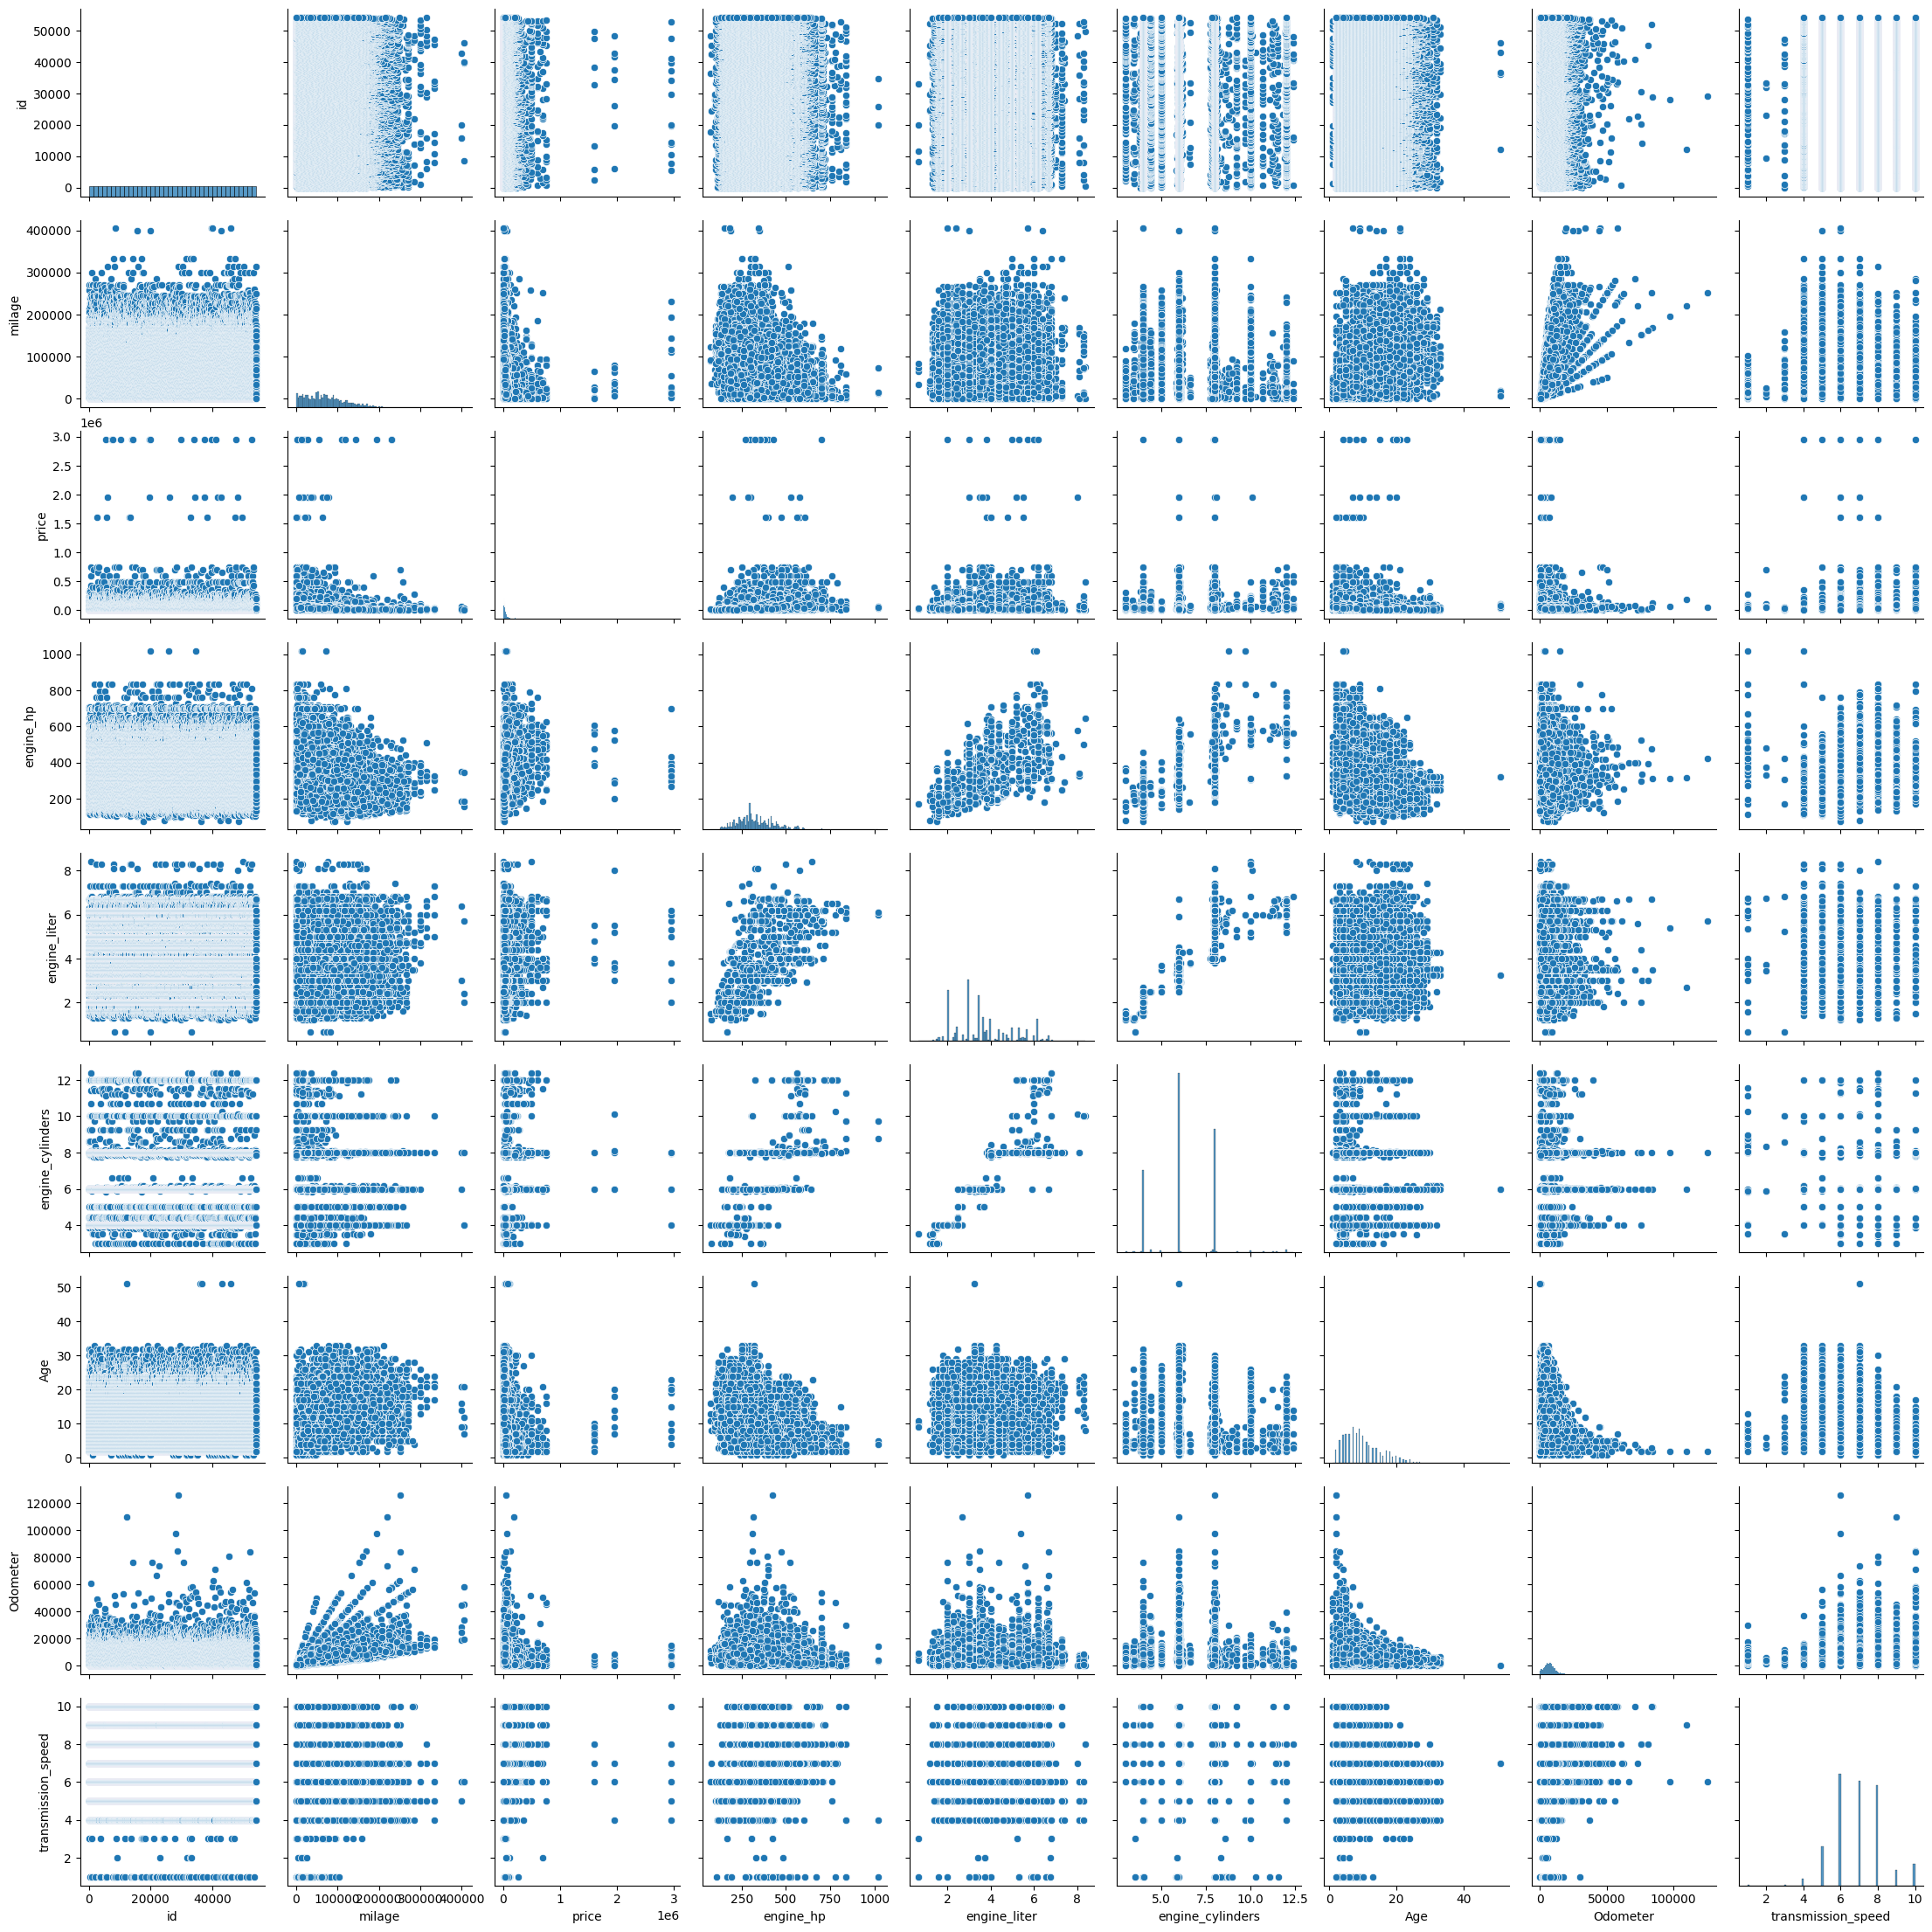

In [147]:
sns.pairplot(df)

<Axes: xlabel='Age'>

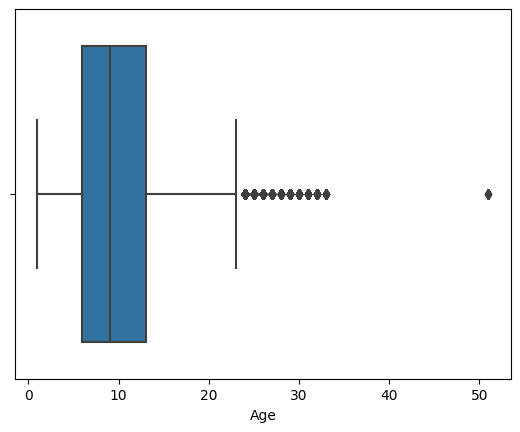

In [148]:
sns.boxplot(x=df['Age'])

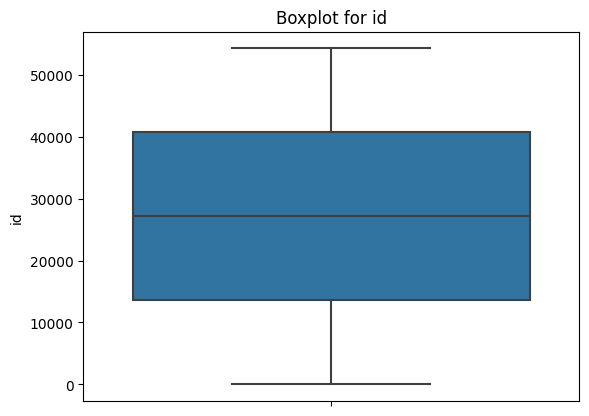

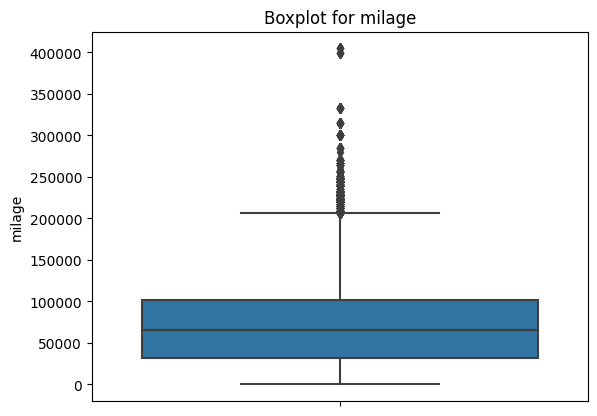

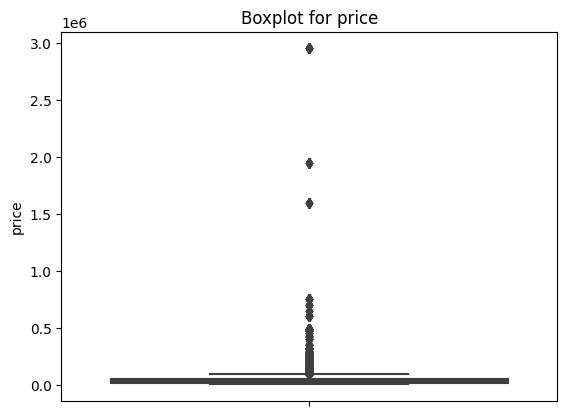

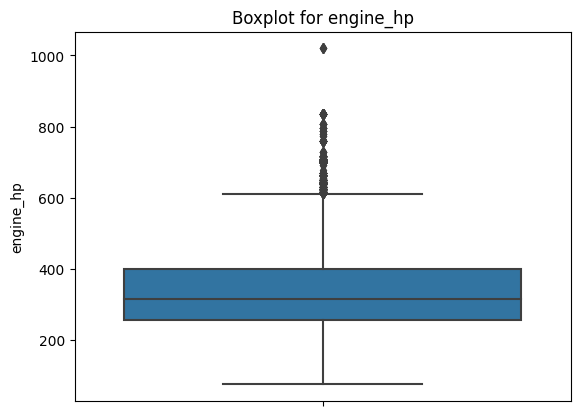

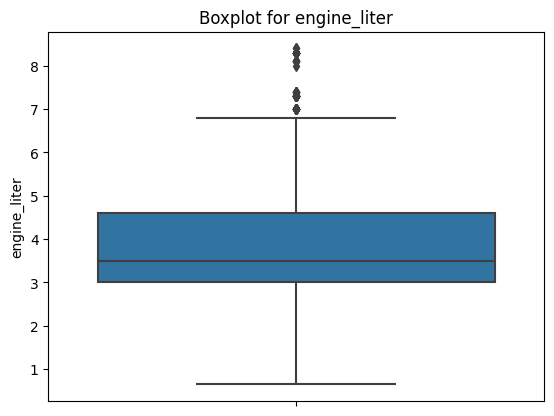

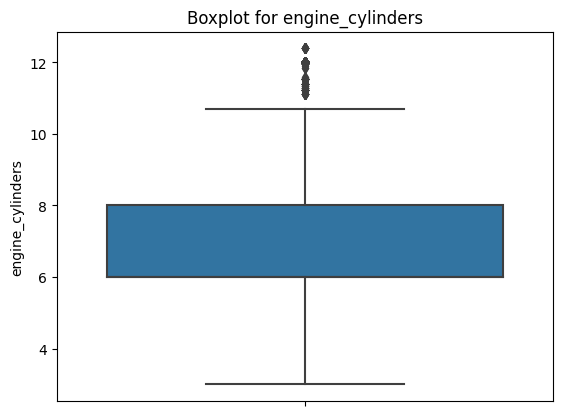

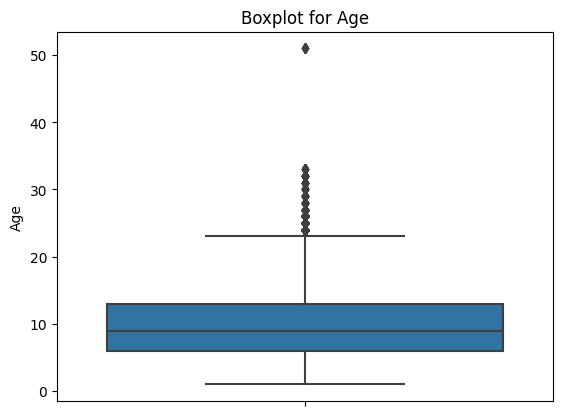

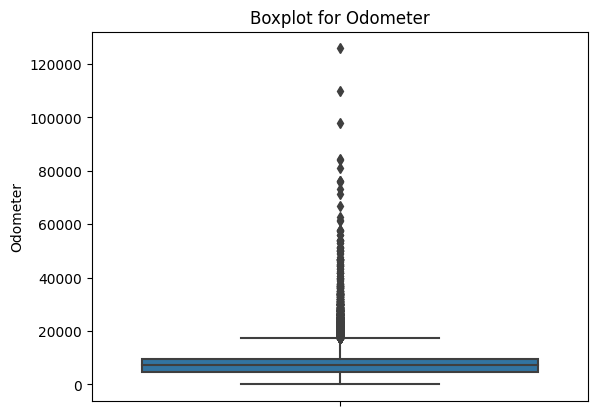

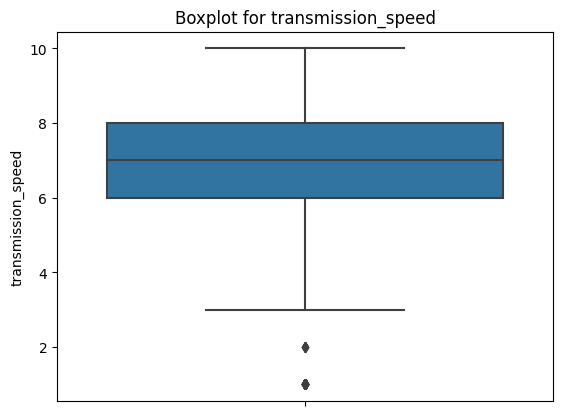

In [149]:


import seaborn as sns
import matplotlib.pyplot as plt

# Extract numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create a boxplot for each numeric column
for col in numeric_cols:
    sns.boxplot(y=col, data=df)
    plt.title(f'Boxplot for {col}')
    plt.show()


In [150]:
"""import pandas as pd
from sklearn.preprocessing import RobustScaler


numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize the RobustScaler
scaler = RobustScaler()

# Apply RobustScaler to the numeric features
df[numeric_features] = scaler.fit_transform(df[numeric_features])

"""

"import pandas as pd\nfrom sklearn.preprocessing import RobustScaler\n\n\nnumeric_features = df.select_dtypes(include=['int64', 'float64']).columns\n\n# Initialize the RobustScaler\nscaler = RobustScaler()\n\n# Apply RobustScaler to the numeric features\ndf[numeric_features] = scaler.fit_transform(df[numeric_features])\n\n"

In [151]:
"""import pandas as pd
from sklearn.preprocessing import RobustScaler


numeric_features = df_test.select_dtypes(include=['int64', 'float64']).columns

# Initialize the RobustScaler
scaler = RobustScaler()

# Apply RobustScaler to the numeric features
df_test[numeric_features] = scaler.fit_transform(df_test[numeric_features])

"""

"import pandas as pd\nfrom sklearn.preprocessing import RobustScaler\n\n\nnumeric_features = df_test.select_dtypes(include=['int64', 'float64']).columns\n\n# Initialize the RobustScaler\nscaler = RobustScaler()\n\n# Apply RobustScaler to the numeric features\ndf_test[numeric_features] = scaler.fit_transform(df_test[numeric_features])\n\n"

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  54273 non-null  int64  
 1   brand               54273 non-null  object 
 2   model               54273 non-null  object 
 3   milage              54273 non-null  int64  
 4   fuel_type           54273 non-null  object 
 5   ext_col             54273 non-null  object 
 6   int_col             54273 non-null  object 
 7   accident            54273 non-null  object 
 8   price               54273 non-null  int64  
 9   engine_hp           54273 non-null  float64
 10  engine_liter        54273 non-null  float64
 11  engine_cylinders    54273 non-null  float64
 12  Age                 54273 non-null  int64  
 13  Odometer            54273 non-null  float64
 14  transmission_type   54273 non-null  object 
 15  transmission_speed  54273 non-null  float64
dtypes: f

In [153]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  36183 non-null  int64  
 1   brand               36183 non-null  object 
 2   model               36183 non-null  object 
 3   milage              36183 non-null  int64  
 4   fuel_type           36183 non-null  object 
 5   ext_col             36183 non-null  object 
 6   int_col             36183 non-null  object 
 7   accident            36183 non-null  object 
 8   engine_hp           36183 non-null  float64
 9   engine_liter        36183 non-null  float64
 10  engine_cylinders    36183 non-null  float64
 11  Age                 36183 non-null  int64  
 12  Odometer            36183 non-null  float64
 13  transmission_type   36183 non-null  object 
 14  transmission_speed  36183 non-null  float64
dtypes: float64(5), int64(3), object(7)
memory usage: 4.1+

In [154]:
df[['engine_hp', 'engine_liter', 'engine_cylinders','transmission_speed','Age','Odometer','milage','price']] = np.log1p(df[['engine_hp', 'engine_liter', 'engine_cylinders','transmission_speed','Age','Odometer','milage','price']])

In [155]:
df.head()

,id,brand,model,milage,fuel_type,ext_col,int_col,accident,price,engine_hp,engine_liter,engine_cylinders,Age,Odometer,transmission_type,transmission_speed
0,0,Ford,F-150 Lariat,11.216539,Gasoline,Blue,Gray,None reported,9.305741,5.929589,1.504077,1.945910,2.079442,9.270709,Automatic,2.397895
1,1,BMW,335 i,11.289794,Gasoline,Black,Black,None reported,9.018090,5.707110,1.386294,1.945910,2.944439,8.399635,Manual,1.945910
2,2,Jaguar,XF Luxury,11.424007,Gasoline,Purple,Beige,None reported,9.615872,5.707110,1.648659,2.197225,2.833213,8.651582,Automatic,1.945910
3,3,BMW,X7 xDrive40i,7.798933,Hybrid,Gray,Brown,None reported,11.058811,5.817111,1.386294,1.945910,1.386294,6.701141,Dual,2.197225
4,4,Pontiac,Firebird Base,11.617294,Gasoline,White,Black,None reported,8.968396,5.303305,1.568616,1.945910,3.218876,8.439448,Automatic,1.791759


In [156]:
df_test[['engine_hp', 'engine_liter', 'engine_cylinders','transmission_speed','Age','Odometer','milage']] = np.log1p(df_test[['engine_hp', 'engine_liter', 'engine_cylinders','transmission_speed','Age','Odometer','milage']])

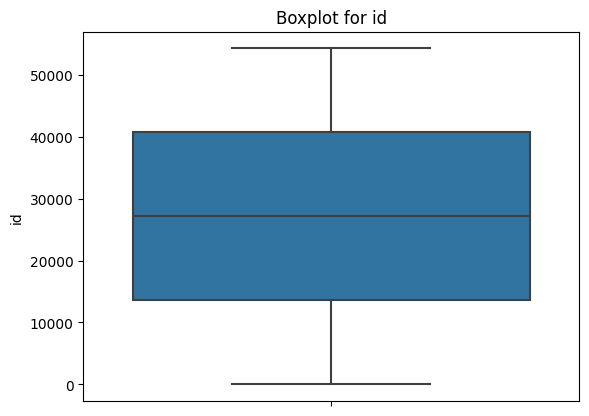

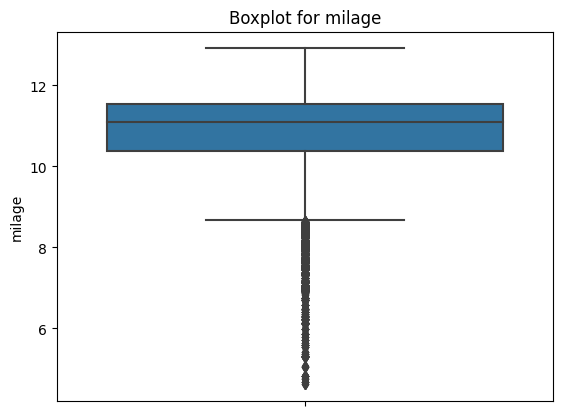

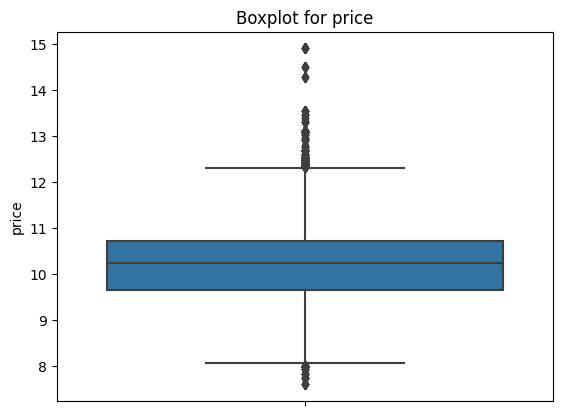

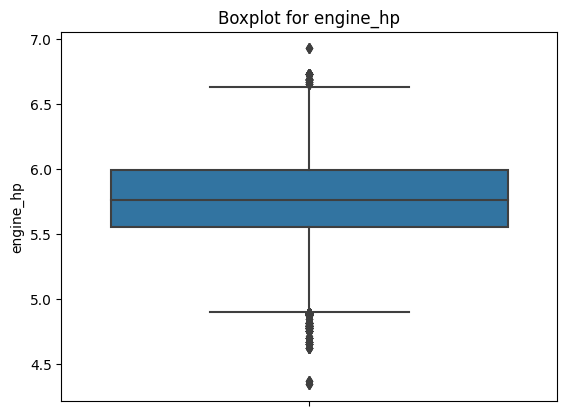

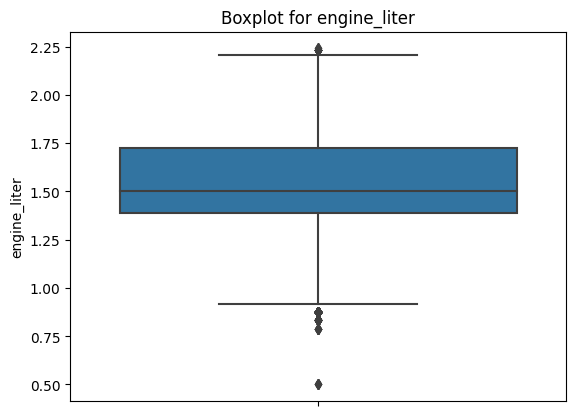

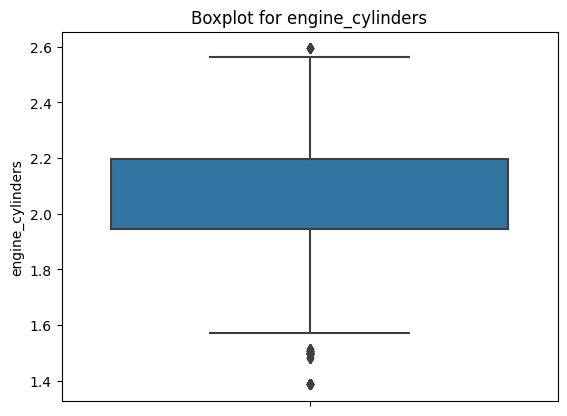

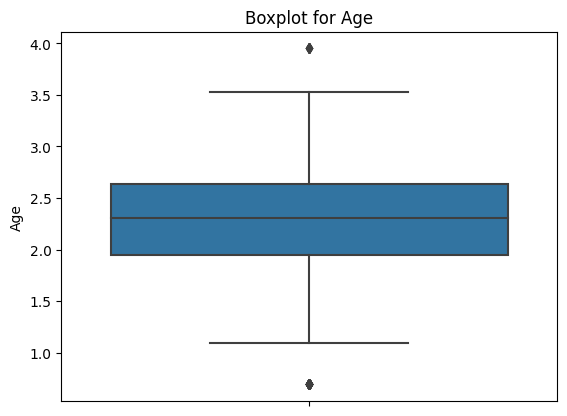

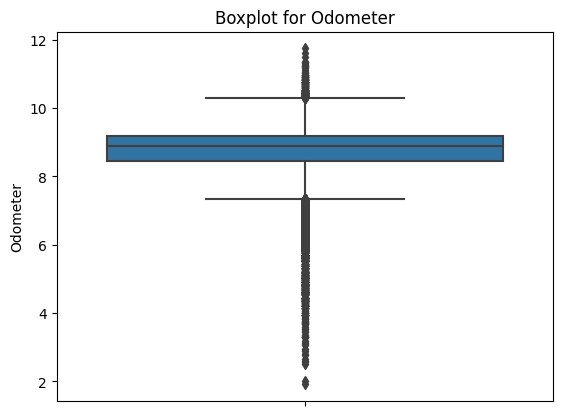

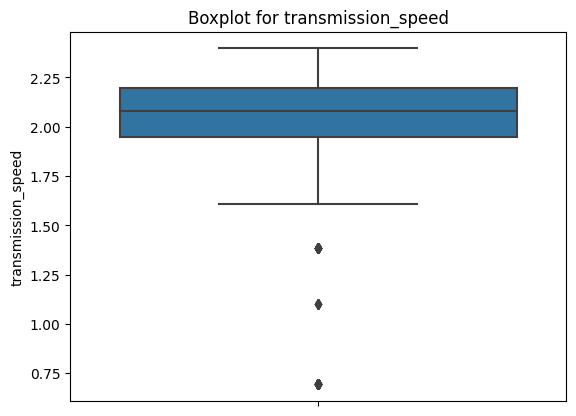

In [157]:


import seaborn as sns
import matplotlib.pyplot as plt

# Extract numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create a boxplot for each numeric column
for col in numeric_cols:
    sns.boxplot(y=col, data=df)
    plt.title(f'Boxplot for {col}')
    plt.show()


In [158]:
#df.to_csv('cleaned_data_trans.csv', index=False)

In [159]:
df.head()

,id,brand,model,milage,fuel_type,ext_col,int_col,accident,price,engine_hp,engine_liter,engine_cylinders,Age,Odometer,transmission_type,transmission_speed
0,0,Ford,F-150 Lariat,11.216539,Gasoline,Blue,Gray,None reported,9.305741,5.929589,1.504077,1.945910,2.079442,9.270709,Automatic,2.397895
1,1,BMW,335 i,11.289794,Gasoline,Black,Black,None reported,9.018090,5.707110,1.386294,1.945910,2.944439,8.399635,Manual,1.945910
2,2,Jaguar,XF Luxury,11.424007,Gasoline,Purple,Beige,None reported,9.615872,5.707110,1.648659,2.197225,2.833213,8.651582,Automatic,1.945910
3,3,BMW,X7 xDrive40i,7.798933,Hybrid,Gray,Brown,None reported,11.058811,5.817111,1.386294,1.945910,1.386294,6.701141,Dual,2.197225
4,4,Pontiac,Firebird Base,11.617294,Gasoline,White,Black,None reported,8.968396,5.303305,1.568616,1.945910,3.218876,8.439448,Automatic,1.791759


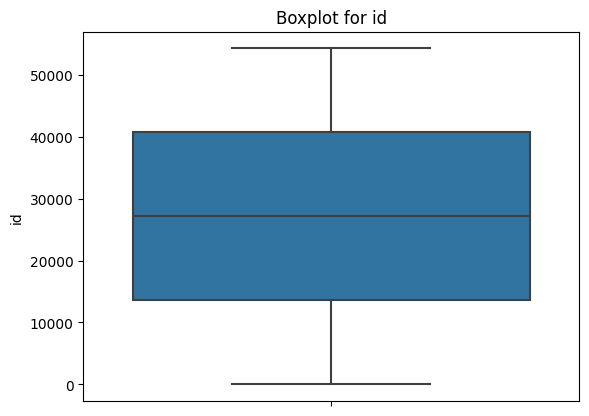

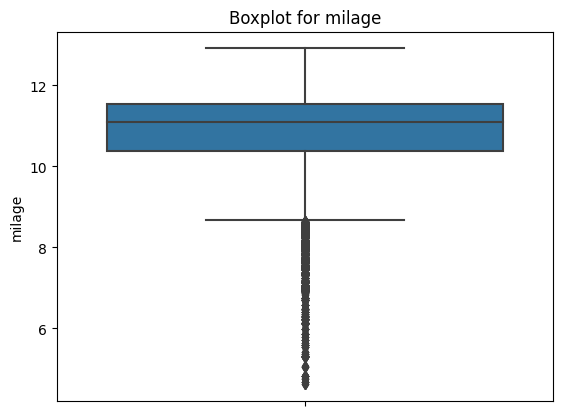

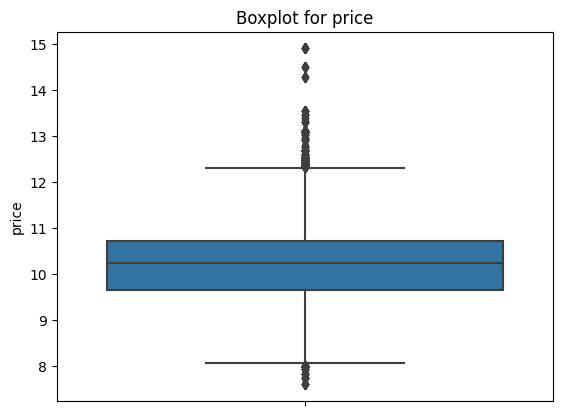

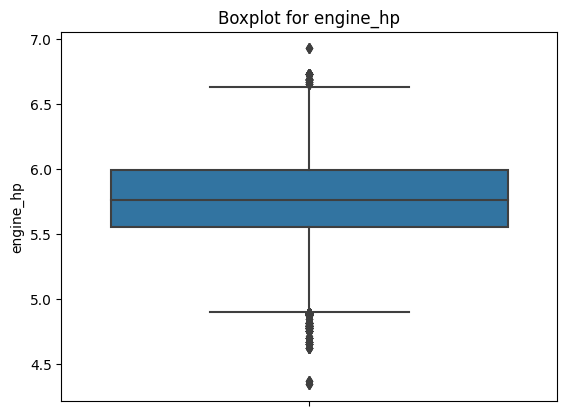

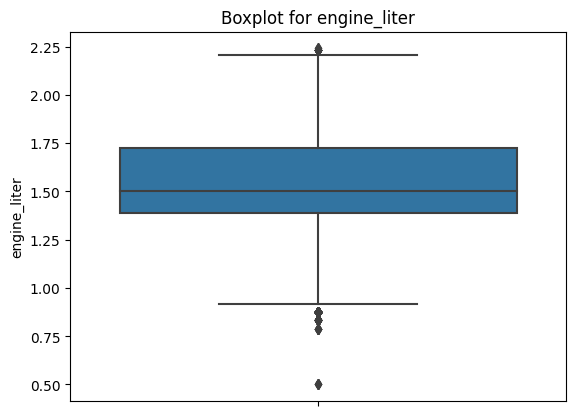

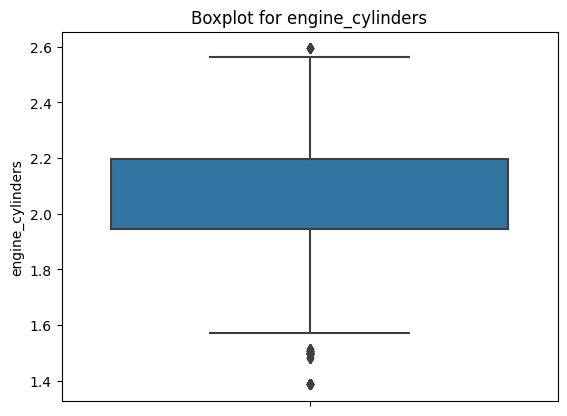

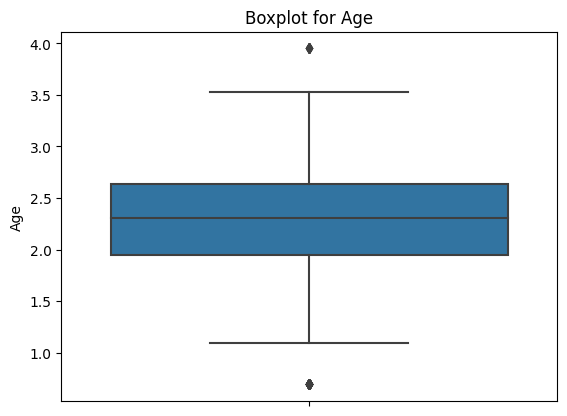

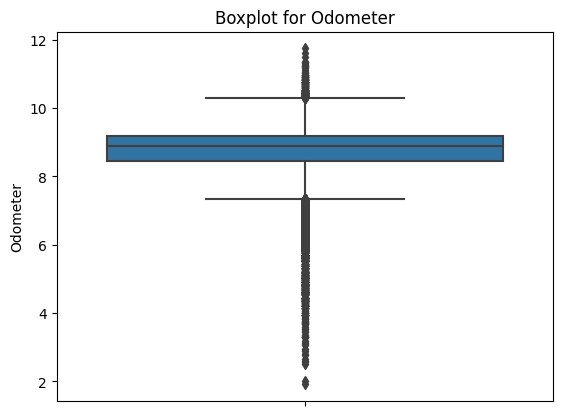

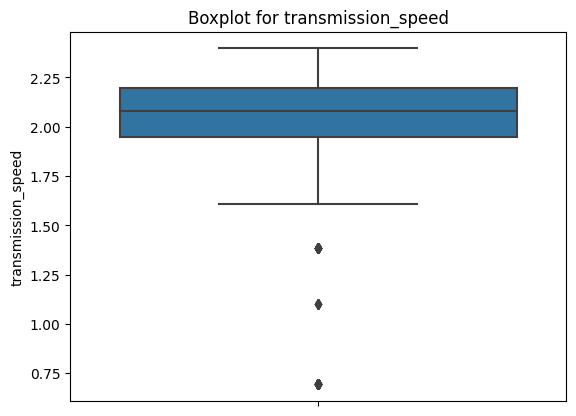

In [160]:


import seaborn as sns
import matplotlib.pyplot as plt

# Extract numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create a boxplot for each numeric column
for col in numeric_cols:
    sns.boxplot(y=col, data=df)
    plt.title(f'Boxplot for {col}')
    plt.show()


In [161]:
#df_test.drop(['price'], axis=1, inplace=True)

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [163]:
data = df

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  54273 non-null  int64  
 1   brand               54273 non-null  object 
 2   model               54273 non-null  object 
 3   milage              54273 non-null  float64
 4   fuel_type           54273 non-null  object 
 5   ext_col             54273 non-null  object 
 6   int_col             54273 non-null  object 
 7   accident            54273 non-null  object 
 8   price               54273 non-null  float64
 9   engine_hp           54273 non-null  float64
 10  engine_liter        54273 non-null  float64
 11  engine_cylinders    54273 non-null  float64
 12  Age                 54273 non-null  float64
 13  Odometer            54273 non-null  float64
 14  transmission_type   54273 non-null  object 
 15  transmission_speed  54273 non-null  float64
dtypes: f

In [165]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  36183 non-null  int64  
 1   brand               36183 non-null  object 
 2   model               36183 non-null  object 
 3   milage              36183 non-null  float64
 4   fuel_type           36183 non-null  object 
 5   ext_col             36183 non-null  object 
 6   int_col             36183 non-null  object 
 7   accident            36183 non-null  object 
 8   engine_hp           36183 non-null  float64
 9   engine_liter        36183 non-null  float64
 10  engine_cylinders    36183 non-null  float64
 11  Age                 36183 non-null  float64
 12  Odometer            36183 non-null  float64
 13  transmission_type   36183 non-null  object 
 14  transmission_speed  36183 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 4.1+

In [ ]:
df_test.head(2)

In [166]:
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
!pip install catboost
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb


X = X.replace([np.inf, -np.inf], np.nan)
X.fillna(0, inplace=True)

# Convert data types if necessary
X = X.astype('float32')

In [ ]:
# Identifying categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Handling high cardinality and low cardinality categorical variables
label_encoder = LabelEncoder()
high_cardinality_cols = [col for col in categorical_cols if data[col].nunique() > 10]
for col in high_cardinality_cols:
    data[col] = label_encoder.fit_transform(data[col])

encoder = OneHotEncoder(sparse=False, drop='first')
low_cardinality_cols = [col for col in categorical_cols if col not in high_cardinality_cols]
encoded_data = encoder.fit_transform(data[low_cardinality_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(low_cardinality_cols))

# Combine the original data frame with the encoded data
processed_data = pd.concat([data.drop(low_cardinality_cols, axis=1), encoded_df], axis=1)

# Splitting the dataset into features and target
X = processed_data.drop('price', axis=1)
y = processed_data['price']


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Creating the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Setting up the GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fitting GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [ ]:
test_data = df_test

# Preprocess the test data (assuming the same preprocessing steps as for the training data)
categorical_cols = [col for col in test_data.columns if test_data[col].dtype == 'object']
high_cardinality_cols = [col for col in categorical_cols if test_data[col].nunique() > 10]
low_cardinality_cols = [col for col in categorical_cols if col not in high_cardinality_cols]

# Label encoding for high cardinality columns
label_encoder = LabelEncoder()
for col in high_cardinality_cols:
    test_data[col] = label_encoder.fit_transform(test_data[col])

# One-hot encoding for low cardinality columns
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data = encoder.fit_transform(test_data[low_cardinality_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(low_cardinality_cols))

# Combine the original test data frame with the encoded data
processed_test_data = pd.concat([test_data.drop(low_cardinality_cols, axis=1), encoded_df], axis=1)
processed_test_data = processed_test_data.reindex(columns=X_train.columns, fill_value=0)
processed_test_data.info()
# Predict using the best model from GridSearchCV
predictions = grid_search.best_estimator_.predict(processed_test_data)

# Extract IDs and corresponding predicted prices
results = pd.DataFrame({
    "id": test_data["id"],  # Replace "id" with the actual ID column name from your test dataset
    "price": predictions
})

# Save or print the results
results['price'] = np.expm1(results['price'] )
print(results.head())
results.to_csv('id_and_price_predictionsrf.csv', index=False)

In [88]:
results.to_csv('id_and_price_predictionsrf.csv', index=False)

In [87]:
results.head()

,id,price
0,54273,24068.329244
1,54274,15330.515751
2,54275,24510.566099
3,54276,57560.858984
4,54277,38729.670104


In [ ]:
results.to_csv('resolts.csv')

In [ ]:
# Save or print the results
print(results.head())

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Assuming 'data' has been loaded and is available as a DataFrame

# Identifying and handling categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
high_cardinality_cols = [col for col in categorical_cols if data[col].nunique() > 10]
for col in high_cardinality_cols:
    data[col] = label_encoder.fit_transform(data[col])

encoder = OneHotEncoder(sparse=False, drop='first')
low_cardinality_cols = [col for col in categorical_cols if col not in high_cardinality_cols]
encoded_data = encoder.fit_transform(data[low_cardinality_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(low_cardinality_cols))

# Combine the original data frame with the encoded data
processed_data = pd.concat([data.drop(low_cardinality_cols, axis=1), encoded_df], axis=1)

# Splitting the dataset into features and target
X = processed_data.drop('price', axis=1)
y = processed_data['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Creating the XGBRegressor model
xgb_model = XGBRegressor(random_state=42)

# Setting up GridSearchCV with XGBRegressor
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fitting GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)


In [ ]:

# Predict using the best model from GridSearchCV
predictions = grid_search.best_estimator_.predict(processed_test_data)

# Extract IDs and corresponding predicted prices
results = pd.DataFrame({
    "id": test_data["id"],  # Replace "id" with the actual ID column name from your test dataset
    "price": predictions
})

# Save or print the results
print(results.head())
results.to_csv('id_and_price_predictions353.csv', index=False)

In [ ]:
!pip install catboost

In [ ]:
X_train.info()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Assuming 'data' has been loaded and is available as a DataFrame

# Identifying categorical columns and applying one-hot encoding
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse=False, drop='first')
data[categorical_cols] = data[categorical_cols].astype(str)  # Convert to string for one-hot encoding
encoded_data = encoder.fit_transform(data[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
processed_data = pd.concat([data.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Splitting the dataset into features and target
X = processed_data.drop('price', axis=1)
y = processed_data['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up the base estimator if necessary
base_estimator = DecisionTreeRegressor(max_depth=3)  # You can adjust the depth based on your preference

# Setting up the parameter grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator__max_depth': [1, 2, 3]
}

# Creating the AdaBoost Regressor model
ada_model = AdaBoostRegressor(base_estimator=base_estimator, random_state=42)

# Setting up GridSearchCV with AdaBoostRegressor
grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fitting GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)


In [ ]:

# Predict using the best model from GridSearchCV
predictions = grid_search.best_estimator_.predict(processed_test_data)

# Extract IDs and corresponding predicted prices
results = pd.DataFrame({
    "id": test_data["id"],  # Replace "id" with the actual ID column name from your test dataset
    "price": predictions
})

# Save or print the results
print(results.head())
results['price'] = np.exp(results(['price']))
print(results.head())
results.to_csv('id_and_price_predictionsada3.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse=False, drop='first')
data[categorical_cols] = data[categorical_cols].astype(str)  # Convert to string for one-hot encoding
encoded_data = encoder.fit_transform(data[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
processed_data = pd.concat([data.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Splitting the dataset into features and target
X = processed_data.drop('price', axis=1)
y = processed_data['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up base estimators
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('ada', AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), n_estimators=50,learning_rate=0.01, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42))
]

# Setting up the meta-regressor
final_estimator = LinearRegression()

# Creating the Stacking Regressor model
stack_model = StackingRegressor(estimators=estimators, final_estimator=final_estimator, cv=5)

# Fitting the model
stack_model.fit(X_train, y_train)

# Optionally, evaluate the model performance
from sklearn.metrics import mean_squared_error
y_pred = stack_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("RMSE:", rmse)

In [ ]:

# Predict using the best model from GridSearchCV
predictions = stack_model.predict(processed_test_data)

# Extract IDs and corresponding predicted prices
results = pd.DataFrame({
    "id": test_data["id"],  # Replace "id" with the actual ID column name from your test dataset
    "price": predictions
})

# Save or print the results
print(results.head())
results.to_csv('id_and_price_predictions3553.csv', index=False)

In [167]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Load your data here; replace 'your_data.csv' with your actual data path
data = df

# Handling categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()

# Encoding high cardinality columns with LabelEncoder
high_cardinality_cols = [col for col in categorical_cols if data[col].nunique() > 10]
for col in high_cardinality_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Encoding low cardinality columns with OneHotEncoder
low_cardinality_cols = [col for col in categorical_cols if col not in high_cardinality_cols]
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data = encoder.fit_transform(data[low_cardinality_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(low_cardinality_cols))

# Combining the original data frame with the encoded data
processed_data = pd.concat([data.drop(low_cardinality_cols, axis=1), encoded_df], axis=1)

# Splitting the dataset into features and target
X = processed_data.drop('price', axis=1)  # Assuming 'price' is the target column
y = processed_data['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Creating the XGBRegressor model
xgb_model = XGBRegressor(random_state=42)

# Setting up GridSearchCV with XGBRegressor
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fitting GridSearchCV
grid_search.fit(X_train, y_train)

# Retrieving the best parameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_  # Note: This will be negative MSE, so take the square root and negate for RMSE
best_rmse = (-best_score) ** 0.5

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1}
Best RMSE: 0.4904916024315365


In [168]:

# Predict using the best model from GridSearchCV
predictions = grid_search.best_estimator_.predict(processed_test_data)

# Extract IDs and corresponding predicted prices
results = pd.DataFrame({
    "id": test_data["id"],  # Replace "id" with the actual ID column name from your test dataset
    "price": predictions
})
results['price'] = np.expm1(results['price'] )
# Save or print the results
print(results.head())
results.to_csv('submit_finalxgb.csv', index=False)

ValueError: feature_names mismatch: ['id', 'brand', 'model', 'milage', 'ext_col', 'int_col', 'engine_hp', 'engine_liter', 'engine_cylinders', 'Age', 'Odometer', 'transmission_speed', 'fuel_type_E85 Flex Fuel', 'fuel_type_Gasoline', 'fuel_type_Hybrid', 'fuel_type_Other', 'fuel_type_Plug-In Hybrid', 'accident_None reported', 'transmission_type_CVT', 'transmission_type_Dual', 'transmission_type_Manual', 'transmission_type_Other'] ['id', 'brand', 'model', 'milage', 'engine_hp', 'engine_liter', 'engine_cylinders', 'Age', 'Odometer', 'transmission_speed', 'fuel_type_E85 Flex Fuel', 'fuel_type_Gasoline', 'fuel_type_Hybrid', 'fuel_type_Other', 'fuel_type_Plug-In Hybrid', 'ext_col_Blue', 'ext_col_Gray', 'ext_col_Other', 'ext_col_Red', 'ext_col_White', 'int_col_Black', 'int_col_Gray', 'int_col_Other', 'accident_None reported', 'transmission_type_CVT', 'transmission_type_Dual', 'transmission_type_Manual', 'transmission_type_Other']
expected ext_col, int_col in input data
training data did not have the following fields: int_col_Black, ext_col_Gray, int_col_Gray, ext_col_White, int_col_Other, ext_col_Red, ext_col_Other, ext_col_Blue

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=2

In [91]:
results.head()

,id,price
0,54273,20139.330078
1,54274,18301.755859
2,54275,24369.544922
3,54276,50078.992188
4,54277,32230.519531


In [92]:

import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

# Load your data here; replace 'your_data.csv' with your actual data path
data = df

# Assuming 'price' is the target column
X = data.drop('price', axis=1)
y = data['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up the parameter grid for CatBoost
param_grid = {
    'iterations': [100, 200],
    'depth': [4, 6, 10],
    'learning_rate': [0.01, 0.1],
    'l2_leaf_reg': [1, 3, 5]
}

# Creating the CatBoostRegressor model
cat_model = CatBoostRegressor(cat_features=[col for col in X.columns if X[col].dtype == 'object'], silent=True, random_state=42)

# Setting up GridSearchCV with CatBoostRegressor
grid_search = GridSearchCV(estimator=cat_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fitting GridSearchCV
grid_search.fit(X_train, y_train)

# Retrieving the best parameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_  # Note: This will be negative MSE, so take the square root and negate for RMSE
best_rmse = (-best_score) ** 0.5

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=   2.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1; total time=   2.1s
[CV] END colsample_b

In [ ]:
test_data.head()

In [93]:

# Predict using the best model from GridSearchCV
predictions = grid_search.best_estimator_.predict(processed_test_data)

# Extract IDs and corresponding predicted prices
results = pd.DataFrame({
    "id": test_data["id"],  # Replace "id" with the actual ID column name from your test dataset
    "price": predictions
})
results['price'] = np.expm1(results['price'] )
# Save or print the results
print(results.head())
results.to_csv('submit_finalcat1.csv', index=False)

CatBoostError: Invalid type for cat_feature[non-default value idx=0,feature_idx=4]=5.713732805509369 : cat_features must be integer or string, real number values and NaN values should be converted to string.

[CV] END depth=10, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=  15.4s
[CV] END depth=10, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=  14.9s
[CV] END depth=10, iterations=100, l2_leaf_reg=3, learning_rate=0.01; total time=  15.7s
[CV] END depth=10, iterations=100, l2_leaf_reg=3, learning_rate=0.1; total time=  15.5s
[CV] END depth=10, iterations=100, l2_leaf_reg=5, learning_rate=0.01; total time=  15.7s
[CV] END depth=10, iterations=100, l2_leaf_reg=5, learning_rate=0.1; total time=  14.6s
[CV] END depth=10, iterations=100, l2_leaf_reg=5, learning_rate=0.1; total time=  15.7s
[CV] END depth=10, iterations=200, l2_leaf_reg=1, learning_rate=0.01; total time=  49.7s
[CV] END depth=10, iterations=200, l2_leaf_reg=1, learning_rate=0.1; total time=  50.9s
[CV] END depth=10, iterations=200, l2_leaf_reg=3, learning_rate=0.01; total time=  48.8s
[CV] END depth=10, iterations=200, l2_leaf_reg=3, learning_rate=0.01; total time=  50.1s
[CV] END depth=10, iterati

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# Assuming 'data' has been loaded and is available as a DataFrame

# Identifying and handling categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
high_cardinality_cols = [col for col in categorical_cols if data[col].nunique() > 10]
for col in high_cardinality_cols:
    data[col] = label_encoder.fit_transform(data[col])

encoder = OneHotEncoder(sparse=False, drop='first')
low_cardinality_cols = [col for col in categorical_cols if col not in high_cardinality_cols]
encoded_data = encoder.fit_transform(data[low_cardinality_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(low_cardinality_cols))

# Combine the original data frame with the encoded data
processed_data = pd.concat([data.drop(low_cardinality_cols, axis=1), encoded_df], axis=1)

# Splitting the dataset into features and target
X = processed_data.drop('price', axis=1)
y = processed_data['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()

# Setting up the parameter grid for SVM
param_grid = {
    'svr__C': [0.1, 1, 10],  # Regularization parameter
    'svr__gamma': ['scale', 'auto'],  # Kernel coefficient
    'svr__kernel': ['rbf', 'linear']  # Specifies the kernel type to be used in the algorithm
}

# Creating the SVR model within a pipeline
pipeline = make_pipeline(scaler, SVR())

# Setting up GridSearchCV with SVR
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fitting GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_  # Note: This will be negative MSE, so take the square root and negate for RMSE
best_rmse = (-best_score) ** 0.5

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)


In [ ]:

# Predict using the best model from GridSearchCV
predictions = grid_search.best_estimator_.predict(processed_test_data)

# Extract IDs and corresponding predicted prices
results = pd.DataFrame({
    "id": test_data["id"],  # Replace "id" with the actual ID column name from your test dataset
    "price": predictions
})

# Save or print the results
print(results.head())
results.to_csv('submit_final67890.csv', index=False)